<a href="https://colab.research.google.com/github/nathannguyen0127/MANE4962-Machine-Learning-for-Engineering/blob/main/Homework06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***MANE 4962: Machine Learning for Engineering***

**Homework 6**

Nathan Nguyen : RIN 662029534

##Problem 1.


###Problem 1a.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

wine = load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

###Problem 1b.

In [ ]:
print("Reduced dataset (first 5 rows):\n", X_pca[:5])
explained_variance = pca.explained_variance_ratio_
print("Explained variance:", explained_variance)

Reduced dataset (first 5 rows):
 [[ 3.31675081  1.44346263]
 [ 2.20946492 -0.33339289]
 [ 2.51674015  1.0311513 ]
 [ 3.75706561  2.75637191]
 [ 1.00890849  0.86983082]]
Explained variance: [0.36198848 0.1920749 ]


###Problem 1c.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42, stratify=y)

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

###Problem 1d.

In [ ]:
X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(X, y, test_size=0.4, random_state=42)

tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_classifier.fit(X_train_og, y_train_og)

svm_predictions = svm_classifier.predict(X_test)
tree_predictions = tree_classifier.predict(X_test_og)

svm_report = classification_report(y_test, svm_predictions, target_names=wine.target_names)
tree_report = classification_report(y_test_og, tree_predictions, target_names=wine.target_names)

print("SVM Classifier Report:\n", svm_report)
print("Decision Tree Classifier Report:\n", tree_report)

SVM Classifier Report:
               precision    recall  f1-score   support

     class_0       0.92      0.92      0.92        24
     class_1       0.93      0.93      0.93        29
     class_2       1.00      1.00      1.00        19

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.95        72
weighted avg       0.94      0.94      0.94        72

Decision Tree Classifier Report:
               precision    recall  f1-score   support

     class_0       1.00      0.85      0.92        26
     class_1       0.84      1.00      0.92        27
     class_2       1.00      0.95      0.97        19

    accuracy                           0.93        72
   macro avg       0.95      0.93      0.93        72
weighted avg       0.94      0.93      0.93        72



###Problem 1e.

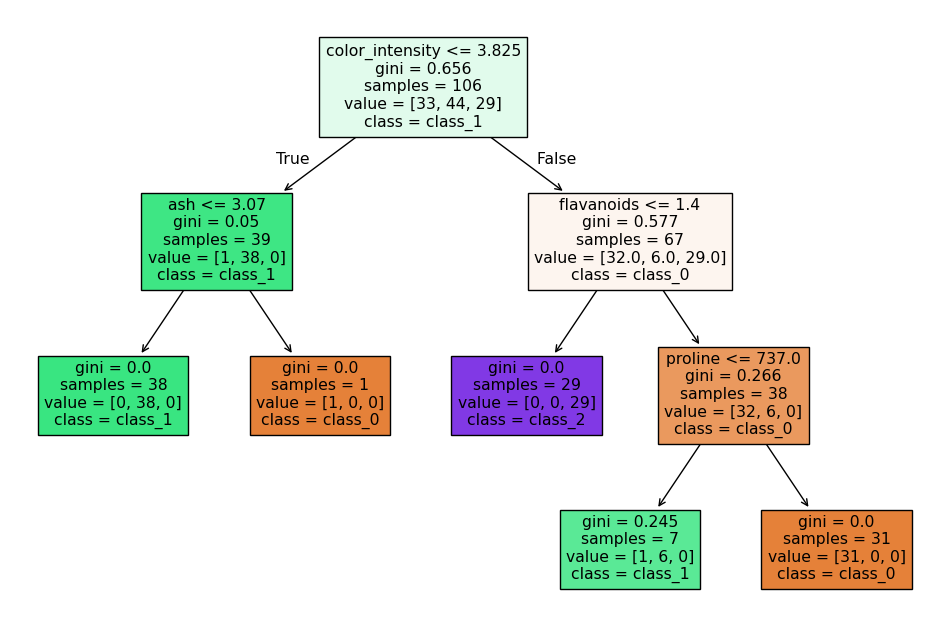

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()

##Problem 2.


In [ ]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x = x.reshape(x.shape[0], -1)
y = y.ravel()

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(x, y)

RandomForestClassifier(random_state=0)

Importances (First 5 Pixels):  [[0.00029496 0.00028338 0.00057829]
 [0.00023433 0.00027176 0.00048378]
 [0.00024912 0.00025386 0.00037671]
 [0.00025642 0.00027973 0.00035397]
 [0.00024806 0.00024899 0.00029943]]


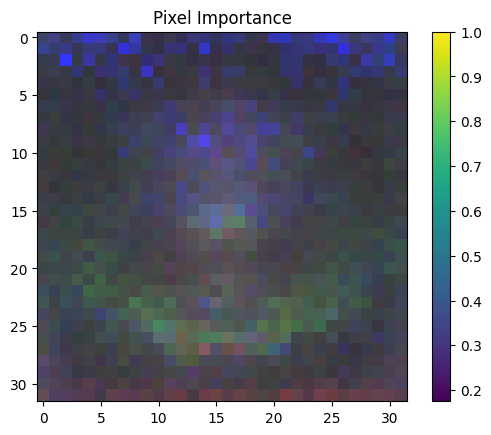

In [ ]:
importances = rf_classifier.feature_importances_.reshape(32, 32, 3)

print("Importances (First 5 Pixels): ", importances[0:5,1])

plt.imshow(importances*1/np.max(importances), interpolation='nearest')
plt.colorbar()
plt.title("Pixel Importance")
plt.show()

##Problem 3.

In [ ]:
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
surface_temp = np.load('/content/drive/MyDrive/MLE Colab/surface_temp.npy')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 2. Prepare the data
# a. Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
surface_temp = scaler.fit_transform(surface_temp.reshape(-1, 1))

# b. Create training dataset
timesteps = 10
train_data = []
train_labels = []

for i in range(timesteps, len(surface_temp) - 10):
    train_data.append(surface_temp[i - timesteps:i, 0])
    train_labels.append(surface_temp[i, 0])

train_data, train_labels = np.array(train_data), np.array(train_labels)
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))

model = Sequential([
  LSTM(units=50, return_sequences=True, input_shape=(train_data.shape[1], 1)),
  LSTM(units=50, return_sequences=False),
  Dense(1),
])

model.compile(loss='mse', optimizer='adam')
model.fit(train_data, train_labels, epochs=20, batch_size=32)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1613
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0338
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0301
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0325
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0293
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0303
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0350
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0302
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0291
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0285
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0262
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0279
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0287
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0228
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0203
Epoch 16/20
31/

[[[0.850973  ]
  [0.91527533]
  [0.85682351]
  [0.71933681]
  [0.75847292]
  [0.95529286]
  [0.91544313]
  [0.55363836]
  [0.25436828]
  [0.01520994]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[0.52198833]
 [0.6983227 ]
 [0.7991263 ]
 [0.8589663 ]
 [0.8871453 ]
 [0.8918806 ]
 [0.88239026]
 [0.86646736]
 [0.8474297 ]
 [0.82872885]]


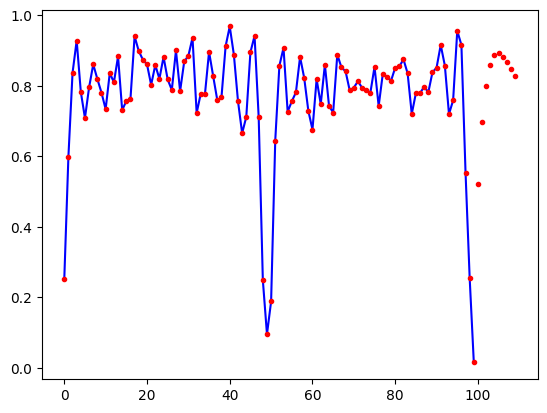

In [ ]:
import matplotlib.pyplot as plt

inputs = surface_temp[len(surface_temp) - timesteps:]
inputs = inputs.reshape(1, timesteps, 1)

predictions = []
for i in range(10):
    prediction = model.predict(inputs)
    predictions.append(prediction[0, 0])
    inputs = np.append(inputs[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print(predictions)

# Show last 100 timesteps before predictions
t = np.append(surface_temp[-100:], predictions)
plt.plot(surface_temp[-100:],'b')
plt.plot(t,'r.')

...